In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data loading and preprocessing
data = pd.read_csv('../data/Sample_Superstore.csv', on_bad_lines='skip')
data = data.dropna()
data['Combined_Category'] = data['Category'].astype(str) + '-' + data['Sub-Category'].astype(str)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Combined_Category
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Furniture-Bookcases
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Furniture-Chairs
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Office Supplies-Labels
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Furniture-Tables
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Office Supplies-Storage


In [3]:
print(set(data['Ship Mode']))
print(set(data['Segment']))
print(set(data['Region']))
print("States:",len(set(data['State'])))
print("Cities:",len(set(data['City'])))
# print(set(data['Category']))
# print(set(data['Sub-Category']))
print(set(data['Combined_Category']))
data.columns

{'Standard Class', 'First Class', 'Same Day', 'Second Class'}
{'Corporate', 'Home Office', 'Consumer'}
{'East', 'South', 'Central', 'West'}
States: 49
Cities: 529
{'Office Supplies-Labels', 'Technology-Phones', 'Office Supplies-Appliances', 'Office Supplies-Binders', 'Office Supplies-Paper', 'Office Supplies-Supplies', 'Office Supplies-Fasteners', 'Office Supplies-Envelopes', 'Technology-Accessories', 'Technology-Machines', 'Furniture-Chairs', 'Furniture-Bookcases', 'Furniture-Furnishings', 'Technology-Copiers', 'Office Supplies-Art', 'Office Supplies-Storage', 'Furniture-Tables'}


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Combined_Category'],
      dtype='object')

In [7]:
# Assume we are going to analysis the item which has 'combined_category' as 'Furniture-Bookcases'

# filter the data
y1 = 'Furniture-Bookcases'
# try to create a folder to save the analysis result
import os
if not os.path.exists('./analysis_result_{}'.format(y1)):
    os.makedirs('./analysis_result_{}'.format(y1))
data = data[data['Combined_Category'] == y1]

# analyze the segment distribution and save in dictionary in both number and percentage
segment_distribution = data['Segment'].value_counts().to_dict()
segment_distribution = {k: (v, round(v / len(data), 2)) for k, v in segment_distribution.items()}
print("The segment distribution of item '{}' is: {}".format(y1, segment_distribution))

# analyze the difference of average quantity between the segment, round to 2 decimal
segment_quantity = data.groupby('Segment')['Quantity'].mean().to_dict()
segment_quantity = {k: round(v, 2) for k, v in segment_quantity.items()}
print("The average quantity of item bought by each segment is: {}".format(segment_quantity))

# analyze the average unit price; profit; discount of each segment, round to 2 decimal
# unit price = sales / quantity
segment_unit_price = data.groupby('Segment')['Sales'].sum() / data.groupby('Segment')['Quantity'].sum()
segment_unit_price = segment_unit_price.to_dict()
segment_unit_price = {k: round(v, 2) for k, v in segment_unit_price.items()}
print("The average unit price of item bought by each segment is: {}".format(segment_unit_price))
# also draw the curve plot by pyplot of unit price along the order-date
# data['Order Date'] = pd.to_datetime(data['Order Date'])
# data_sort_by_date = data.sort_values(by='Order Date')
# plt.plot(data_sort_by_date['Order Date'], data_sort_by_date['Sales'] / data_sort_by_date['Quantity'])
# plt.xlabel('Order Date')
# plt.ylabel('Unit Price')
# plt.title('Unit Price of item {} along the order date'.format(y1))
# plt.show()

# mean profit = profit / quantity
segment_profit = data.groupby('Segment')['Profit'].sum() / data.groupby('Segment')['Quantity'].sum()
segment_profit = segment_profit.to_dict()
segment_profit = {k: round(v, 2) for k, v in segment_profit.items()}
print("The average profit of item bought by each segment is: {}".format(segment_profit))

# discount
segment_discount = data.groupby('Segment')['Discount'].mean()
segment_discount = segment_discount.to_dict()
segment_discount = {k: round(v, 2) for k, v in segment_discount.items()}
print("The average discount of item bought by each segment is: {}".format(segment_discount))

# analyze the region distribution and save in dictionary in both number and percentage
region_distribution = data['Region'].value_counts().to_dict()
region_distribution = {k: (v, round(v / len(data), 2)) for k, v in region_distribution.items()}
print("The region distribution of item '{}' is: {}".format(y1, region_distribution))

# analyze the Ship Mode distribution and save in dictionary in both number and percentage
ship_mode_distribution = data['Ship Mode'].value_counts().to_dict()
ship_mode_distribution = {k: (v, round(v / len(data), 2)) for k, v in ship_mode_distribution.items()}
print("The Ship Mode distribution of item '{}' is: {}".format(y1, ship_mode_distribution))

# analyze the Ship Speed distribution and save in dictionary in both number and percentage
# ship speed = ship date - order date
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Speed'] = data['Ship Date'] - data['Order Date']
data['Ship Speed'] = data['Ship Speed'].dt.days
ship_speed_distribution = data['Ship Speed'].value_counts().to_dict()
ship_speed_distribution = {k: (v, round(v / len(data), 2)) for k, v in ship_speed_distribution.items()}
# sort by keys
ship_speed_distribution = dict(sorted(ship_speed_distribution.items()))
print("The Ship Days distribution of item '{}' is: {}".format(y1, ship_speed_distribution))



The segment distribution of item 'Furniture-Bookcases' is: {'Consumer': (130, 0.58), 'Corporate': (62, 0.28), 'Home Office': (33, 0.15)}
The average quantity of item bought by each segment is: {'Consumer': 3.79, 'Corporate': 4.16, 'Home Office': 3.06}
The average unit price of item bought by each segment is: {'Consumer': 138.61, 'Corporate': 128.61, 'Home Office': 121.2}
The average profit of item bought by each segment is: {'Consumer': -9.11, 'Corporate': 1.72, 'Home Office': 3.21}
The average discount of item bought by each segment is: {'Consumer': 0.22, 'Corporate': 0.22, 'Home Office': 0.16}
The region distribution of item 'Furniture-Bookcases' is: {'West': (80, 0.36), 'East': (67, 0.3), 'Central': (50, 0.22), 'South': (28, 0.12)}
The Ship Mode distribution of item 'Furniture-Bookcases' is: {'Standard Class': (122, 0.54), 'Second Class': (48, 0.21), 'First Class': (48, 0.21), 'Same Day': (7, 0.03)}
The Ship Days distribution of item 'Furniture-Bookcases' is: {0: (7, 0.03), 1: (12, 

In [5]:
data[data['Combined_Category'] == y1].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Combined_Category
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Furniture-Bookcases
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,Furniture-Bookcases
38,39,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,Furniture-Bookcases
186,190,CA-2015-102281,10/12/2015,10/14/2015,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,East,FUR-BO-10002613,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360,4,0.20,112.3920,Furniture-Bookcases
189,193,CA-2015-102281,10/12/2015,10/14/2015,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,East,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520,3,0.20,46.9764,Furniture-Bookcases


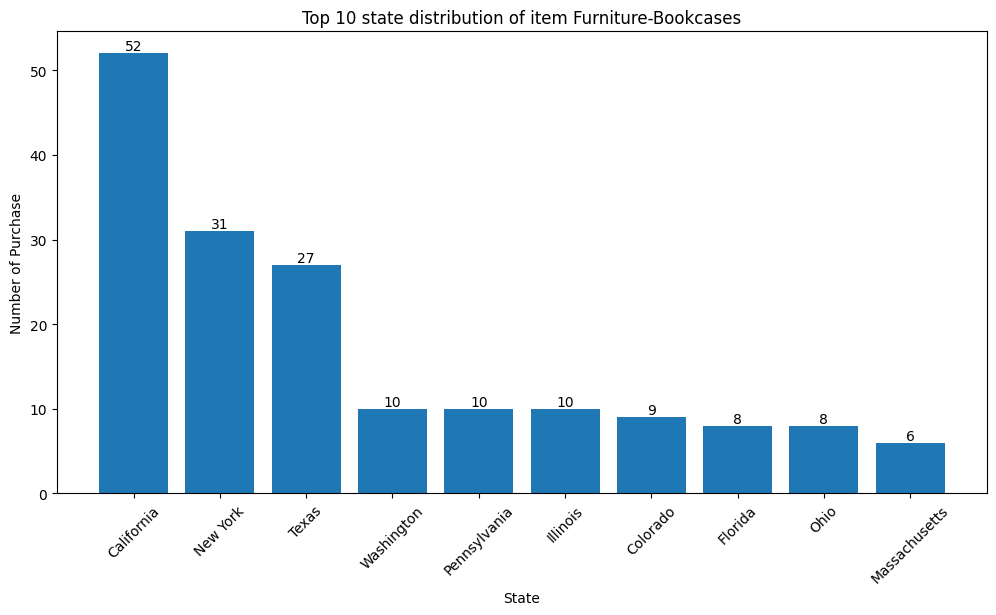

<Figure size 640x480 with 0 Axes>

In [6]:
# analyze the state distribution and save in dictionary in both number and percentage
state_distribution = data['State'].value_counts().to_dict()
state_distribution = {k: (v, round(v / len(data), 2)) for k, v in state_distribution.items()}
# print("The state distribution of item '{}' is: {}".format(y1, state_distribution))
# Extract the number of purchases for the top 10 states
top_10_states = dict(list(state_distribution.items())[:10])
top_10_states_values = [v[0] for v in top_10_states.values()]

# Draw the top 10 states distribution in a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_states.keys(), top_10_states_values)
plt.xlabel('State')
plt.ylabel('Number of Purchase')
plt.title('Top 10 state distribution of item {}'.format(y1))
for i, v in enumerate(top_10_states_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()
# save plot
plt.savefig('./analysis_result_{}/top_10_states_distribution_{}.png'.format(y1, y1))

{'New York City': (28, 0.12), 'San Francisco': (16, 0.07), 'Los Angeles': (14, 0.06), 'Houston': (12, 0.05), 'Seattle': (10, 0.04), 'Philadelphia': (8, 0.04), 'Chicago': (6, 0.03), 'Dallas': (5, 0.02), 'Springfield': (4, 0.02), 'Columbus': (4, 0.02)}


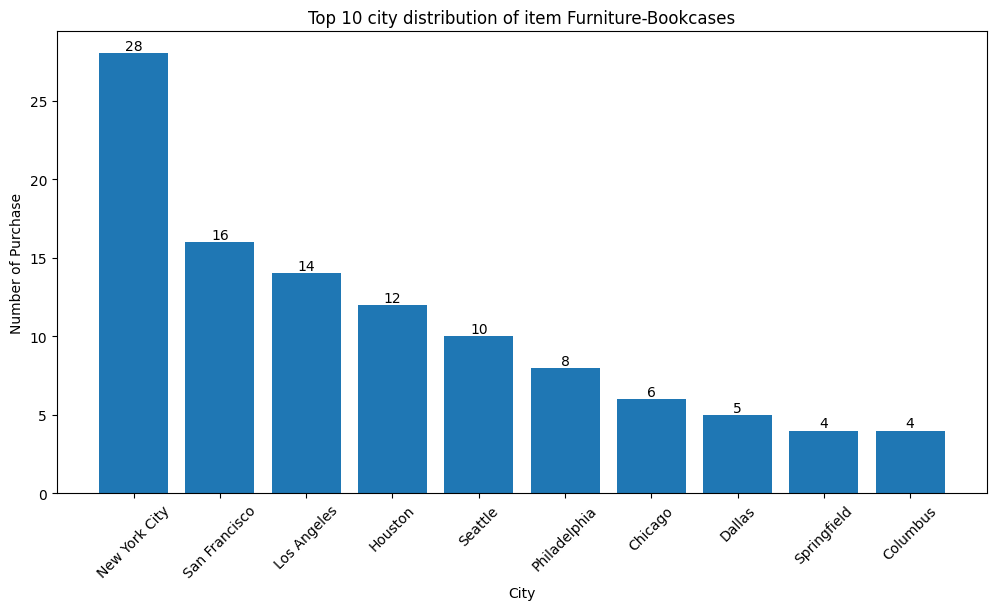

<Figure size 640x480 with 0 Axes>

In [7]:

# analyze the city distribution and save in dictionary in both number and percentage
city_distribution = data['City'].value_counts().to_dict()
city_distribution = {k: (v, round(v / len(data), 2)) for k, v in city_distribution.items()}
# print("The city distribution of item '{}' is: {}".format(y1, city_distribution))
# Extract the number of purchases for the top 10 cities
top_10_cities = dict(list(city_distribution.items())[:10])
top_10_cities_values = [v[0] for v in top_10_cities.values()]
print(top_10_cities)

# Draw the top 10 cities distribution in a bar plot with the value on the top of each bar
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities.keys(), top_10_cities_values)
plt.xlabel('City')
plt.ylabel('Number of Purchase')
plt.title('Top 10 city distribution of item {}'.format(y1))
for i, v in enumerate(top_10_cities_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()
# save plot
plt.savefig('./analysis_result_{}/top_10_cities_distribution_{}.png'.format(y1, y1))

In [13]:
# save the upper text analysis into a jsonl file
# keep the structure of dictionary
import json
with open('./analysis_result_{}/analysis_result_{}.json'.format(y1, y1), 'w') as f:
    json.dump({
        'segment_distribution': segment_distribution,
        'segment_quantity': segment_quantity,
        'segment_unit_price': segment_unit_price,
        'segment_profit': segment_profit,
        'segment_discount': segment_discount,
        'region_distribution': region_distribution,
        'ship_mode_distribution': ship_mode_distribution,
        'ship_days_distribution': ship_speed_distribution,
        # 'state_distribution': state_distribution,
        # 'city_distribution': city_distribution,
        'top_10_states': top_10_states,
        'top_10_cities': top_10_cities
    }, f, indent=4)

with open('./analysis_result_{}/analysis_result_{}_oneline.json'.format(y1, y1), 'w') as f:
    json.dump({
        'segment_distribution': segment_distribution,
        'segment_quantity': segment_quantity,
        'segment_unit_price': segment_unit_price,
        'segment_profit': segment_profit,
        'segment_discount': segment_discount,
        'region_distribution': region_distribution,
        'ship_mode_distribution': ship_mode_distribution,
        'ship_days_distribution': ship_speed_distribution,
        # 'state_distribution': state_distribution,
        # 'city_distribution': city_distribution,
        'top_10_states': top_10_states,
        'top_10_cities': top_10_cities
    }, f)